# Introduction to Numerical Modeling: Diffusion


*CU Boulder GEOL 3600/5700 Introduction to Python Programming for Earth Scientists*

October 2023

#### Python Learning objectives

- Learn to work with random() funtions.
- Learn to seed the random() function to get repeatable random arrays.
- Learn how to time the execution of a section of code.

- Work with a numerical model for diffusion.
- Know what are initial conditions and boundary conditions.
- Learn about time step and a stability criterion.


#### Geoscience Learning objectives

- Understand what drives the process of diffusion
- Learn about application of diffusion for ash particle from a volcanic eruption 

Note: The lecture notes on diffusion are inspired by Prof. Frédéric Herman's course on geophysical processes, then further developed by Dr. Benjamin Campforts for the Earth Surface Processes Modeling Summer Institute (ESPIN. )

## What is diffusion? 

The diffusion equation can be used to represent a variety of natural and environmental processes. It was introduced by Fourier in 1822 to calculate the distribution of the temperature in materials. 

The diffusion equation can be used to model heat transfer in water or the earth's crust, transfer of mass along hillslopes and thus the erosion of mountain ranges, soil evolution, transport of contaminants in an aquifer or in the atmosphere, and many other phenomena.


The following movie illustrates Brownian motion.
We can see that the equation we intend to derive for diffusion must
represent the movement of molecules from a zone of high concentration to a
zone of low concentration.

https://www.youtube.com/watch?v=UhL9OsRSKO8

**Movie 1:** Brownian motion causes food dye molecules to move throughout a solute.

If we simplify this into a concept diagram:

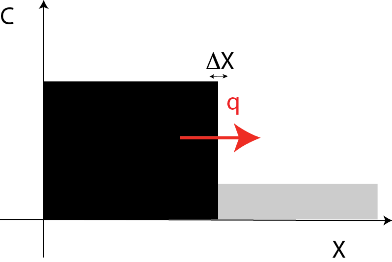


**Figure 1**: Diffusion is the movement of molecules from high
to low concentrations due to random processes. <br>
Here, `C` represents the concentration, `X` is the horizontal distance
and `q` is the net particle flow.


Due to diffusion, the particles move from the black zone to the grey
zone. This can be explained by the fact that each particle can move at
any moment in any direction, over a given distance. In one dimension, a
particle can move to the left or to the right with equal probability,
and this as well in the gray region as the black region. However, at the
transition from the black zone to the grey zone, the probability of
seeing particles move from left to right is much larger than the
opposite, because there are many more black particles. 

Thus particle transfer depends on the difference of concentration $\Delta C$ and
the distance that the particle must travel $\Delta x$, where $\Delta C$ is the
difference of concentration in a transition zone of length $\Delta X$.
Therefore, we can see that the flow of particles (i.e. the number of
particles passing through per unit surface and time (in 2D, mol m<sup>-1</sup>
s<sup>-1</sup>) will depend on the concentration gradient. Over time,
the concentration changes as illustrated in Figure 2.

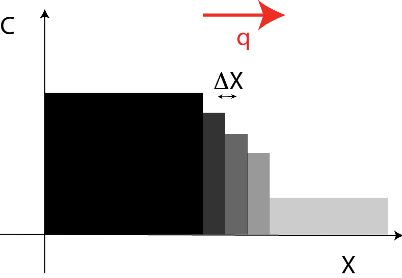

**Figure 2:** Concentration changes over time due to diffusion.

##  Section 1: Modeling random movement of particles

The goal of this first section is to model the process of diffusion through the random movement of particles.


In [ ]:
# importing packages
import random
import time

import matplotlib.pyplot as plt
import numpy as np

We will use `numpy.random.rand()` function. 
It creates an array of specified shape and fills it with random float values with values between 0 and 1.


In [ ]:
# a couple of notes on how to use random()

myrandomarray=np.random.rand(5)
print(myrandomarray)

# or 2d array

# myrandomarray2d=np.random.rand(5,3)
# print(myrandomarray2d)


# if you want them to be in a certain range, say 0-6?

# myrandomarray=np.random.rand(5)* 6
# print(myrandomarray)

# lastly if you do not want floats but rather want random integers

# myrandomintarray = np.random.randint(low = 0, high = 8, size = 5) 
# print(myrandomintarray)


In [ ]:
# Create a vector, `xp`, with 100,000 particles with random values between -20 and 20. 

nb = 100000
xp = np.random.rand(nb) * 40 - 20


Represent this graphically using a histogram (use the `plt.hist()` function) and using the number of bins `xbins` (see below) in which we calculate the frequency (that is, the number of particles that is in each bin).

In [ ]:
xbins = np.arange( -20, 20, 1)
# The number of bins for which you calculate the frequency (i.e. the number of particles that is in each bin.)

plt.hist(xp, bins=xbins)  # arguments are passed to np.histogram
plt.xlabel("Horizontal distance")
plt.ylabel("Number of particles")
plt.show()

### Let's create a simulation in which particles move over random distances

- each particle moves over a random distance (positive or negative). This distance varies from -2 to 2. Use the `random` function again. 

- Run the loop 100 times (`nbT` =100). You will need two for loops (also referred to as nested for-loops). 

- Plot the resulting distribution every 50 iterations. Fix the limits of the y axes (`plt.ylim()`) to better understand how the distribution changes with time. 

- Let's check how long it takes to execute the loop (using a timer) 

In [ ]:
nbT = 100
t_ini = time.time()

for t in range(0, nbT):
    for i in range(0, nb):
        xp[i] += random.random() * 4 - 2
    if t % 50 == 0:
        plt.figure()
        plt.hist(xp, bins=xbins)
        plt.title("Time is: " + str(t))
        plt.xlabel("Horizontal distance")
        plt.ylabel("Number of particles")
        plt.ylim((0,5e3))
        plt.show()

elapsed = time.time() - t_ini
print("Elapsed time is: " + str(elapsed) + "sec")

As you notice, this code is slow and takes several seconds.

Let's **vectorize** the problem using numpy arrays to speed up the calculation and get rid of the inner for loop (I will be keeping the loop taking care of time). <br>
We will change `nbT` to 10000 iterations

In [ ]:
# reset the seed to produce reproducible results
random.seed(1)
np.random.seed(1)

nb = 10000
xp = np.random.rand(nb) * 20 - 10
xbins = np.arange(-200, 200, 5)
plt.hist(xp, bins=xbins)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


nbT = 10000
t_ini = time.time()

for t in range(0, nbT):
    xp += np.random.rand(nb) * 4 - 2 #here is the vectorization
    if t % 2000 == 0:
        plt.figure()
        plt.hist(xp, bins=xbins)
        plt.title("Time is: " + str(t))
        plt.xlabel("Horizontal distance")
        plt.ylabel("Number of particles")
        plt.ylim((0, 5e3))
        plt.show()

elapsed = time.time() - t_ini
print("Elapsed time is: " + str(elapsed) + "sec")

## <div style="color:green">In-class practice</div>

Now that you have an efficient solution, answer the following questions:

1. Describe the evolution of the particles. How does the shape of the histogram evolve?
2. Why does the evolution of the histogram over time slow down?


Note for these next questions you will either need to copy the codes and reinitialize some of the variables, or restart your kernel and execute the cells above with your new values

3. What happens if the number of particles is reduced to 1000?
4. What happens if the distance of the displacement now varies randomly between -10 and 10? Why is this the case?


In [ ]:
# reduced to 1000

In [ ]:
# step distance changed

## Derivation of the diffusion equation

In the previous section, we modeled a particle transfer assuming a random particle shift. The model showed that the change in particle distribution depends on the concentration difference $\Delta C$ and the distance the particle must travel $\Delta x$, where $\Delta C$ is the difference in concentration in the transition zone of length $\Delta x$ (Figure 2).

From these observations, we can thus conclude that particle flow, i.e. the number of particles passing through the side of an infinitesimal block per unit of time, will depend on the concentration gradient (Figure 2).

We can therefore say that the flux, $q$ is defined by:

$$q = -D\frac{\Delta C}{\Delta x} \label{eq:1} \tag{1}$$


where $D$ corresponds to the diffusion coefficient $\mathrm{(m^{2} s^{-1})}$. *C* represents the concentration or the number of elements in a 2-dimensional infinitesimal block. 
The diffusion coefficient will vary from one problem to another and defines the speed of particle transfer.<br>
Now, we would like to know how the *concentration* changes during the calculations. Let's take an unit-length block with an incoming flow, and an outgoing flow (Figure 3).

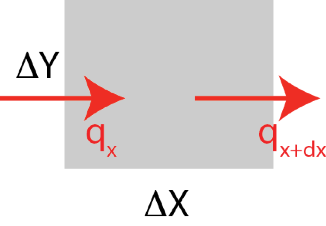

**Figure 3:** Unit-dimension block with an incoming flux, and an outgoing flux.

As the concentration varies in the *X* direction, the flux will be
different at the input and at the output of the block. The difference of
the number of particles in the block can therefore be derived from the
flux:

$$ \Delta (number \: of \: particles) = (q_x -q_{x+dx}\Delta Y \Delta t)\label{eq:A1} \tag{A1}$$

Note that the term $\Delta t$ appears because the flux dimensions are in $\mathrm{(mol \: m^{-1} s^{-1})}$ and that $\Delta (number \: of \: particles)$ is in mol.

We also know that the concentration change over an infinitesimally small
unit of time corresponds to the change in the number of particles for a
given volume:

$$ \Delta C=  \frac{\Delta (number \: of \: particles) }{\Delta X \Delta Y} \label{eq:A2} \tag{A2}$$

which gives:

$$ \Delta (number \: of \: particles) = \Delta C \Delta X \Delta Y \label{eq:A3} \tag{A3}$$

By combining Equation (\ref{eq:A1}) and (\ref{eq:A3}), we can write:

$$ (q_x -q_{x+dx}) \Delta Y \Delta t = \Delta C \Delta X \Delta Y  \label{eq:A4} \tag{A4}$$

$$ (q_x -q_{x+dx}) \Delta t = \Delta C \Delta X  \label{eq:A5} \tag{A5}$$


$$ \frac{\Delta C}{\Delta t} = \frac{q_x -q_{x+dx}}{\Delta X} \label{eq:A6} \tag{A6}$$

We obtain the following equation (note the use of the $\partial$ symbol: we solve a PDE):

$$ \frac{\partial C}{\partial t} = -\frac{\partial q}{\partial x}  \label{eq:2} \tag{2}$$
By combining Eqs.(\ref{eq:1}) and (\ref{eq:2}), we finally obtain the heat
equation: 

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2}  \label{eq:3} \tag{3}$$

which depends only on the curvature (i.e. the second derivative) of the concentration and the diffusion constant. Therefore, it is sufficient to know the diffusion coefficient $D$ (which can be measured) and to measure the curvature to estimate the change in concentration over time.

## Section 2: Change in concentration due to diffusion

Here we solve the diffusion equation and write a code that allows us to solve this equation numerically. The change in concentration will be calculated over a distance $Lx$. There are two ways to do this, we can either calculate the second derivative directly (i.e. the curvature), or do it in two steps by calculating the flux (i.e. the first derivative of the concentration) and then the derivative of the flux. We will use the second method because it is easier to calculate a first derivative than a second derivative.

To be able to do the calculation we also need an **initial condition** (i.e. the starting concentration) and **boundary conditions** (i.e. the concentration in $x = 0$ and $x = Lx$). 

Finally, you will have to choose a time step that is small enough. The [Von Neumann stability analysis](https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis) prescribes that $\Delta t$ must be smaller than $\frac{\Delta X^2}{2D}$. 

Now, try to solve the diffusion equation through discretization of ([Eq. 3](#mjx-eqn-eq:3)). 
Make the following assumptions: 
1. The initial condition:
    -   $C(x<=\frac{Lx}{2}) = 500 \: \mathrm{(mol \: m^{-2})}$
    -   $C(x>\frac{Lx}{2}) = 0 \: \mathrm{(mol \: m^{-2})}$
    -   $Lx = 30  \: \mathrm{m}$ or $Lx = 300   \: \mathrm{m}$
    -   $D  = 100 \:  \mathrm{(m^{2} s^{-1})}$
    -   $\Delta x = 0.1  \: \mathrm{m}$


2. Assumptions regarding the boundary conditions:
    -   $C(x=0)  = 500 \: \mathrm{(mol \: m^{-2})}$
    -   $C(x=Lx) = 0 \: \mathrm{(mol \: m^{-2})}$
    


## <div style="color:green">In-class practice</div>

The code to solve this exercise must have the following structure:

- setting up the problem with dimensions and initial conditions (given)
- see what that set-up looks like by plotting it (please code this up)
- set a time step that likely results in a stable simulation using the Von Neuman criterion (please code that up)

In [ ]:
# given...
# set up your scenario
D = 100
Lx = 300
time = 0

# numerical properties
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)
nt = 10000
nout = 1000

# initial condition
# Choose an initial condition where C = C1 when x <= (Lx/2) and C = 0 when x > (Lx/2)
C1 = 500
C2 = 0
C = np.zeros_like(x)

C[x <= Lx / 2] = C1
C[x > Lx / 2] = C2


In [ ]:
# Plot the initial concentration C over distance x



In [ ]:
# use the Von Neuman stability criterion (see equation above) to set a timestep `dt` that satisfies this condition
# print dt



In [ ]:
# the actual model run: solve the heat equation and plot the result.

# the time loop
for t in range(0, nt):
    # in this loop, first calculate the flux by discretizing equation (1),
    # we will use vectorized code (using NumPy diff statement)
    q = -D * np.diff(C) / dx

    # Update the new concentration (Eq. 2, without changing the boundary values)
    #  Careful: which nodes do you have to update now?
    C[1:-1] = C[1:-1] - dt * np.diff(q) / dx

    # plot intermediate results, but only for every 200 time steps
    if t % 200 == 0:
        # plt.figure()
        plt.plot(x, C)
        plt.title("Time is: " + str(t))

plt.show()

Now, let's try to answer the following questions: 

1. What is the shape of the concentration in equilibrium?
2. How long does it take to reach equilibrium?
3. Let *Lx* vary between 30 and 300, and *D* between 20 and 500. How does the time change to arrive at equilibrium according to *L* and *D*?

To be able to answer the questions, you can modify your code to assume a condition on the concentration that defines when the solution will have reached a state of equilibrium. To implement this, replace the for loop with a while loop: 

~~~
Cp=C
it=0
diff=1e6

while ...: #(diff > 1e-4)
    it +=1 
    #update the time
    #calculate the flow with the discretized equation (eq. 1)
    #calculate the new concentration (eq. 2)(without changing the BC's)

    #check if the solution changes
    diff = # sum of absolute difference between Cp and C
    Cp = C
    #plotting (only every 10000 iterations)
~~~

In [ ]:
# set up your scenario
D = 100
Lx = 300
time = 0

# numerical properties
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)
nt = 10000
nout = 1000

C1 = 500
C2 = 0
C = np.zeros_like(x)

C[x <= Lx / 2] = C1
C[x > Lx / 2] = C2

dt = dx * dx / D / 2.1
print("dt is: " + str(dt))

C_n = np.zeros_like(C)
C_n[:] = C
diff = np.inf


it = 0
plt.figure()

while diff > 1e-4:
    it += 1
    q = -D * np.diff(C) / dx
    C_n[1:-1] = C[1:-1] - dt * np.diff(q) / dx
    diff = np.sum(abs(C - C_n))
    C[:] = C_n
    if it % 10000 == 0:
        plt.plot(x, C)
plt.title("Time is: " + str(it * dt) + " sec")
plt.show()
print("Difference at the end is: " + str(diff))

## Practice your skills: Eyjafjallajokull volcanic eruption

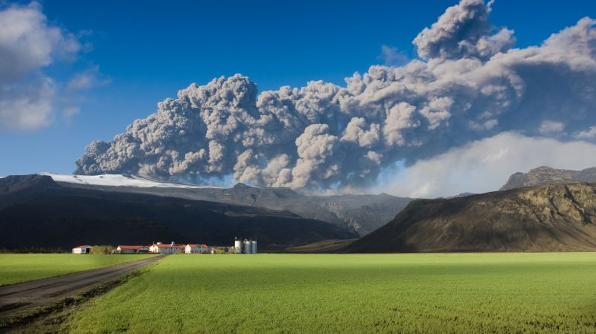

**Figure 5:** "On March 2010 Eyjafjallajokull volcano in Iceland exploded into life, spewing lava, magma, rock and clouds of ash into the sky above it. The eruption grounded airlines, stranding tourists and business passengers across Europe and North America. 



**Exercise: 1D diffusion.**

The Eyjafjallajökull volcano is located in the Southern Iceland and 2000 km from mainland Europe. Consider a one-dimensional case with a domain length of 5000 km. The volcano itself is situated at 2220 km from the left boundary of the simulation domain. Brussels is situated at 4220 km from the left boundary of the simulation domain. Choose a spatial resolution of 20 km. In the next couple of steps, you will calculate the time required to obtain a specific ash concentration above Brussels. 

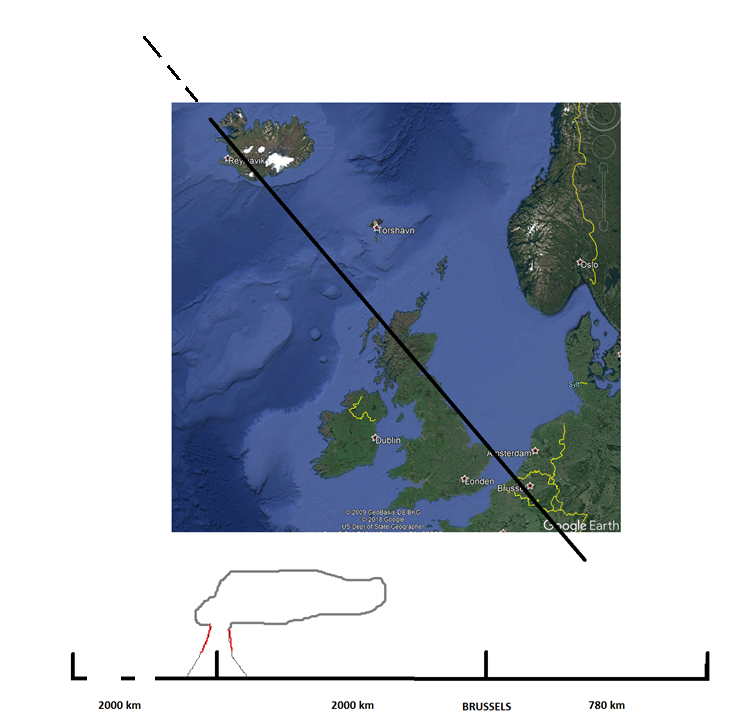

**Figure 6:** 1D situation sketch.

Solve the spread of ash using the diffusion equation (Eq. 3)

Define the model parameters: 

- set the diffusivity to 25 km$^2$/h

- define the model domain: total length is 5000 km, spatial resolution is 20 km

- calculate the location (index in the np array) of the volcano and of Brussels and call the variables respectively `ind_vol` and `ind_Bru`

- Set the initial conditions (C): at the volcano the concentration is 100 ppm, over the rest of the domain the concentration is 0 ppm.

- The Eyjafjallajökull volcano produced ashes almost continuously during a couple of weeks. Start from the initial condition above but now add 100 ppm ashes per hour to the volcano grid cell as a source term, `C_rate`. 

- Assume the following boundary conditions (0 ppm at 0 km and 0 ppm at 3000 km)

- Plot the initial concentration, also indicate the location of Brussels on the plot (HINT use `plt.scatter()`)

- Calculate and print out the time step (dt) determined through a stability criterion

In [ ]:
# set up your scenario
D = 25
Lx = 5000
time = 0

# numerical properties
dx = 20
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)
nt = 10000
nout = 1000

# Determine the location of volcano, ind_vol and Brussels,int_Bru
# ADD YOUR CODE HERE FOR THIS


#then continue
C_ini = 100
C_rate = 100
Cstart = 0
Cend = 0
C = np.zeros(x.shape)

C[0] = Cstart
C[ind_vol] = C_ini
C[-1] = Cend

plt.figure()
plt.plot(x, C)
plt.scatter(x[ind_Bru], C[ind_Bru], c="r")

dt = dx * dx / D / 2.5
print("dt is: " + str(dt) + "hours")

it = 0
plt.figure()

Now we can ask the following...

- After how many hours do we get 5 ppm ash aerosols in Brussels?
- Is this realistic? 

Use the code derived above to solve this question (the while loop). Plot the output every 100 iterations

In [ ]:
#YOUR CODE HERE

#print("Concentration reached after: " + str(int(it * dt)) + " hours")
#print("or : " + str(int(it * dt / 24)) + " days")